# NEST SIMULATION 
##### 1. IMPORTING RELEVANT DATA FROM SNUDDA GENERATED NEURON FILES:\
    a) Neuron Matrix: to keep the info of neuron types \
    b) Synaptic Matrix: Where each row has the info of [preID, posID] of one synapse \
    for now every synapse will have the same properties, no matter the types of neurons\
    (later we can add more info on this matrix that will help set the type of synapses used for each)\
    c*) (optional/not really relevant but already available) Positions: matrix with coordinates for each neuron position\
    d) Info about the input given to the neurons
##### 2) CREATING THE NEST NETWORK \
    a) Create the neurons (the correct # of neurons, in their posiiton*)\
    b) Connect the neurons (for loop with Synaptic Matrix as info)\
    c) Connect the measuring devices to the neurons in order to observe spiking and voltage \
    d) Create the spike generators to feed the input 
##### 3) RUN THE SIM
    

### 0. LIBRARIES

In [1]:
import nest
import matplotlib.pyplot as plt

from getData import *
from plot import *


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-3.1
 Built: Sep 28 2021 11:43:45

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [22]:
chin_color='xkcd:orange'
ispn_color='xkcd:blue purple'
lts_color='xkcd:bright purple'
dspn_color='xkcd:sky blue'
fs_color='xkcd:dark blue'
import matplotlib.ticker as ticker


def ComputeFiringRatesNEST(senders, times, neuron_IDs):

    dspn_spks = []
    ispn_spks = []
    lts_spks = []
    chin_spks = []
    fs_spks = []
    
    dspn_ID, ispn_ID, lts_ID, fs_ID, chin_ID = getNeuronSubMatrixes(neuron_IDs)


    for i in range(0, len(senders)):
        if senders[i] in dspn_ID:
            dspn_spks.append(times[i])
        elif senders[i] in ispn_ID:
            ispn_spks.append(times[i])
        elif senders[i] in chin_ID:
            chin_spks.append(times[i])
        elif senders[i] in lts_ID:
            lts_spks.append(times[i])
        elif senders[i] in fs_ID:
            fs_spks.append(times[i])

    dspn_spikes_dt = []
    ispn_spikes_dt = []
    chin_spikes_dt = []
    lts_spikes_dt = []
    fs_spikes_dt = []

    for d_time in range (0, 1981, 20):

        start = d_time
        stop = d_time + 20
        spikes_dt_aux = [0,0,0,0,0]

        for elem in dspn_spks:
            if (start < elem <= stop):
                spikes_dt_aux[0] +=1
        for elem in ispn_spks:
            if (start < elem <= stop):
                spikes_dt_aux[1] +=1
        for elem in chin_spks:
            if (start < elem <= stop):
                spikes_dt_aux[2] +=1
        for elem in lts_spks:
            if (start < elem <= stop):
                spikes_dt_aux[3] +=1
        for elem in fs_spks:
            if (start < elem <= stop):
                spikes_dt_aux[4] +=1

        dspn_spikes_dt.append(spikes_dt_aux[0])
        ispn_spikes_dt.append(spikes_dt_aux[1])
        chin_spikes_dt.append(spikes_dt_aux[2])
        lts_spikes_dt.append(spikes_dt_aux[3])
        fs_spikes_dt.append(spikes_dt_aux[4])
        
    N_dspn = len(dspn_ID)
    N_ispn = len(ispn_ID)
    N_chin = len(chin_ID)
    N_lts= len(lts_ID)
    N_fs = len(fs_ID)

    dspn_fr = []
    ispn_fr = []
    chin_fr = []
    lts_fr = []
    fs_fr = []

    for elem in dspn_spikes_dt:
        dspn_fr.append(elem*50/(N_dspn))
    for elem in ispn_spikes_dt:
        ispn_fr.append(elem*50/(N_ispn))
    for elem in chin_spikes_dt:
        chin_fr.append(elem*50/(N_chin))
    for elem in lts_spikes_dt:
        lts_fr.append(elem*50/(N_lts))
    for elem in fs_spikes_dt:
        fs_fr.append(elem*50/(N_fs))

    time = []
    for d_time in range (0, 1981, 20):
        time.append(d_time)

    return(time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr)

def plotFRNEST(senders, times, neuron_IDs):
    
    time, dspn_fr, ispn_fr, chin_fr, lts_fr, fs_fr = ComputeFiringRatesNEST(senders, times, neuron_IDs)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axes.xaxis.set_visible(False)
    plt.ylim(0, 105)
    
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    plt.step(time, lts_fr, color = lts_color, linewidth=0.5)
    plt.step(time, chin_fr, color = chin_color, linewidth=0.5)
    plt.step(time, fs_fr, color = fs_color, linewidth=0.5)
    plt.step(time, dspn_fr, color = dspn_color, linewidth=1)
    plt.step(time, ispn_fr, color = ispn_color, linewidth=1)
    
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(' Firing Rate [Hz]')

    plt.show()
    
    #------------------------------------------------------------#
    fig1 = plt.figure()
    ax1 = fig1.add_axes([0,0,1,1])
    ax1.axes.xaxis.set_visible(False)
    plt.ylim(0, 105)
    
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
   
    plt.step(time, lts_fr, color = lts_color, linewidth=0.5)
    plt.step(time, chin_fr, color = chin_color, linewidth=0.5)
    plt.step(time, fs_fr, color = fs_color, linewidth=0.5)
    
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel(' Firing Rate [Hz]')
    
    plt.show()
    
    #------------------------------------------------------------#    
    fig2 = plt.figure()
    ax2 = fig2.add_axes([0,0,1,1])
    ax2.axes.xaxis.set_visible(False)
    plt.ylim(0, 35)
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))    
    plt.step(time, dspn_fr, color = dspn_color, linewidth=1)
    plt.step(time, ispn_fr, color = ispn_color, linewidth=1)
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel(' Firing Rate [Hz]')
    
    plt.show()
    
    return

def RasterNEST(evs,ts, neuron_IDs):
    spikes = {}
    for i in range(0, len(evs)) :

        nID = evs[i]
        spike_time = ts[i]
        if(nID not in spikes.keys()):
            spikes[nID] = []            
        spikes[nID].append(spike_time)

    for i in range(0, 100):
        if(i not in spikes.keys()):
            spikes[i] = []

    n_ids = np.array(list(spikes.keys()), dtype=int)
    n_ids.sort() #organize the neurons by id

    dspn_ID, ispn_ID, lts_ID, fs_ID, chin_ID = getNeuronSubMatrixes(neuron_IDs)

    orderedIDs = getOrderedIDs(dspn_ID, ispn_ID, lts_ID, fs_ID, chin_ID)


    fig_handle = plt.figure()
    fig, ax = plt.subplots(1,1)
    ax = fig_handle.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.set_xlabel('$t$ (ms)')
    ax.axes.yaxis.set_visible(False)


    plotSpikes(spikes, fs_ID, orderedIDs, fs_color, 'fs', ax)
    plotSpikes(spikes, dspn_ID, orderedIDs,dspn_color, 'dspn', ax)
    plotSpikes(spikes, lts_ID, orderedIDs, lts_color, 'lts', ax)
    plotSpikes(spikes, ispn_ID, orderedIDs,ispn_color , 'ispn', ax)
    plotSpikes(spikes, chin_ID, orderedIDs, chin_color, 'chin', ax)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    # Put a legend to the right of the current axis

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    return()

def plotSpikes(events, id_array, raster_order, color, label, ax):
    
    label_done = False
    
    for neuron_id in id_array:
        
        spikes = events[neuron_id] #array of the spike times of neuron i
        
        index = raster_order.index(neuron_id)
        if not label_done:
            ax.plot(spikes, np.full_like(spikes, index), ms = 3, marker=".", label=label, color=color, linestyle="None")

            #this full_like function generates an array that has the same size as events[i], with the value index
            #on every position (so we #have the same number of x and ys for plotting)
            label_done = True
        else:
            ax.plot(spikes, np.full_like(spikes, index), ms = 3, marker=".", color=color, linestyle="None")
    return()

### 1. IMPORTING DATA

In [3]:
positions_list = getNeuronPositions('net_100')

synaptic_matrix = getSynapses('net_100')

input_matrix = getInput('net_100', 100)

### 2. CREATING THE NEST NETWORK

Here we create a position list, with the coordinates of each neuron of the network.
(This first step is not necessary, since the spatial distribution of the network does not influence the NEST simulation.)

In [4]:
pos = nest.spatial.free(positions_list) # using NEURON positions

Now we create all the neurons at once, with same characteristics. They are all conductance based integrate and fire model, with the default parameters of nest.\
(to accomodate differente models, this will have to be upgraded, so that the creation parameters can change according to type. once this is done changes in the connection protocol will be needed, bc they wont all be in the same population) [idea: if possible to apply changes with "set" command instead of in the moment of creation, to make it easier]

In [5]:
s_nodes = nest.Create("iaf_cond_alpha", 99, positions=pos) 

With the info of the synaptic matrix, we create the pre-synaptic as post-synaptic neuron ID lists, and transform them into numpy arrays

In [6]:
pre_list = []
pos_list = []

for i in range(0,len(synaptic_matrix)):
    pre_list.append(s_nodes[synaptic_matrix[i][0]])
    pos_list.append(s_nodes[synaptic_matrix[i][1]])
    
pre_array = np.transpose(np.array(pre_list)).flatten()
pos_array = np.transpose(np.array(pos_list)).flatten()

With the arrays ready, we can connect the synapses all in one command.
(again here, if we wish to have different parameters and arguments for each synapse, a more complex solution is necessary.)

In [7]:
syn_wgt = np.full(len(pre_array), -2.0)
nest.Connect(pre_array,pos_array,conn_spec= "one_to_one", syn_spec= {"weight": syn_wgt})

Now onto the creation of the Spike Generators.

In [8]:
inputs = nest.Create("spike_generator", 99)

In [9]:
for g, generator in enumerate(inputs):

    nest.SetStatus(generator, {"spike_times": np.array(input_matrix[g])})

In [10]:
spikerecorder = nest.Create("spike_recorder")

In [11]:
input_syn_wgt = np.full(len(inputs), 11.0)
nest.Connect(inputs,s_nodes, conn_spec= "one_to_one", syn_spec={"weight": input_syn_wgt})

In [12]:
nest.Connect(s_nodes,spikerecorder, conn_spec= "all_to_all")

### RUNNING THE SIMULATION
Here we are using a total run itme of 2000 ms (and the default step of simulation of 0.1 ms)

In [13]:
nest.Simulate(2000.0)


Nov 21 02:49:29 NodeManager::prepare_nodes [Info]: 
    Preparing 199 nodes for simulation.

Nov 21 02:49:29 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 199
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Nov 21 02:49:29 SimulationManager::run [Info]: 
    Simulation finished.


### ANALYSING THE RESULTS

In [14]:
dSD = spikerecorder.get("events")
evs = dSD["senders"]
ts = dSD["times"]

neuron_IDs = getNeuronMatrix('net_100')


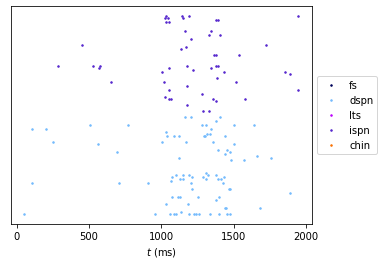

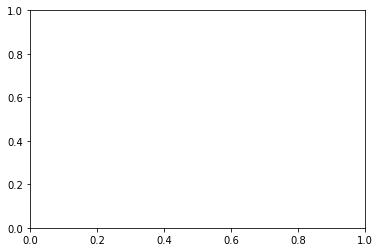

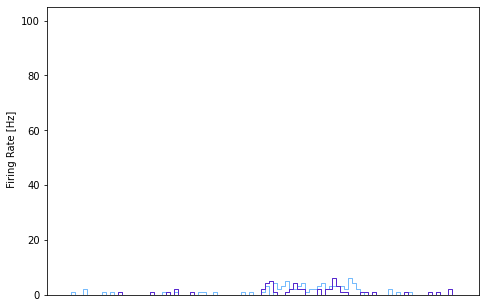

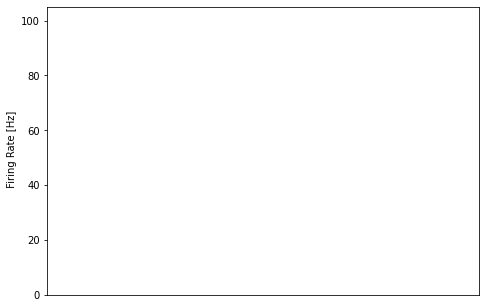

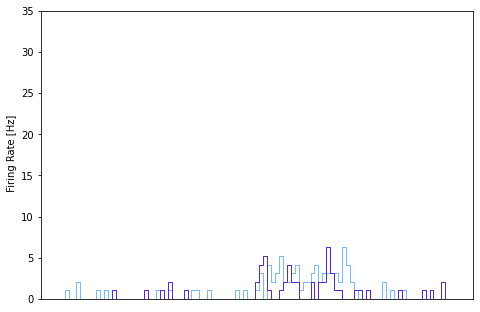

In [23]:

RasterNEST(evs, ts , neuron_IDs)

plotFRNEST(evs, ts, neuron_IDs)